In [13]:
from sklearn.datasets import load_iris
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#import pingouin as pg

In [19]:
# Load the Iris dataset from scikit-learn
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:

# Convert the Iris dataset into a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) column to the DataFrame
iris_df['target'] = iris.target

# Create a mapping of target values to species names
target_to_species = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Add a new column 'species' based on the mapping
iris_df['species'] = iris_df['target'].map(target_to_species)
# Display the first few rows of the DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

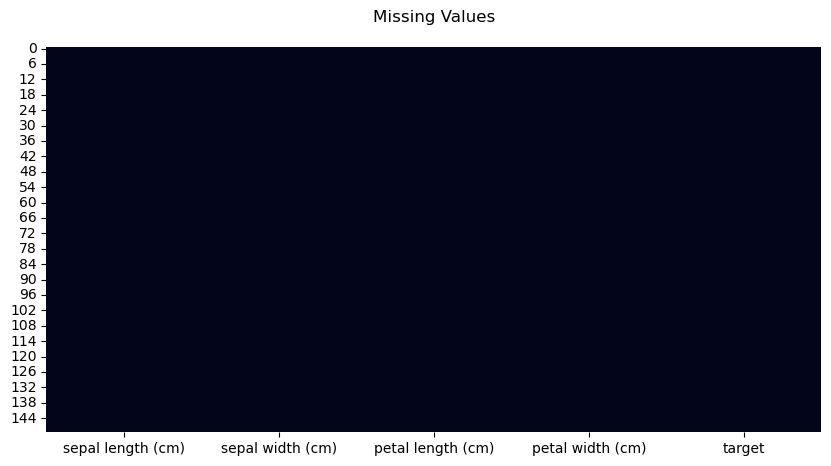

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [21]:
# missing values
plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(iris_df.isnull(), cbar=False)
plt.show()

iris_df.isnull().sum()

In [ ]:
iris_df

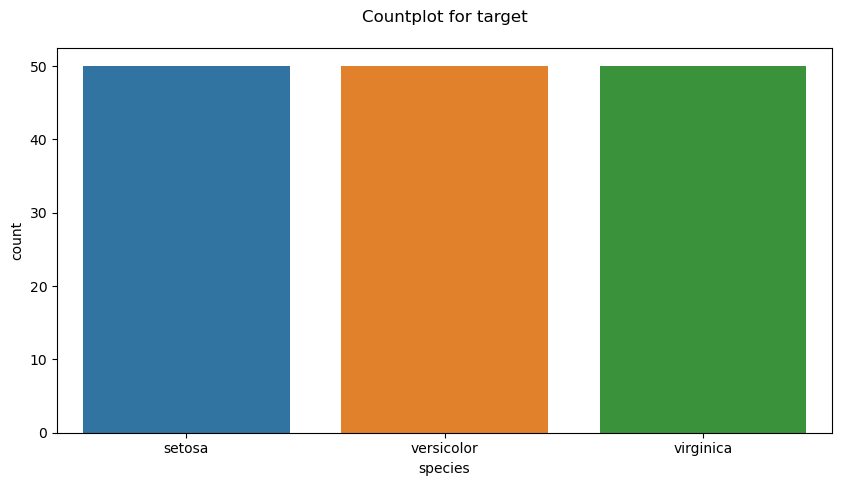

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [28]:
plt.figure(figsize=(10, 5))
plt.title('Countplot for target\n')
sns.countplot(data=iris_df, x=iris_df['species'])
plt.show()

iris_df['species'].value_counts()

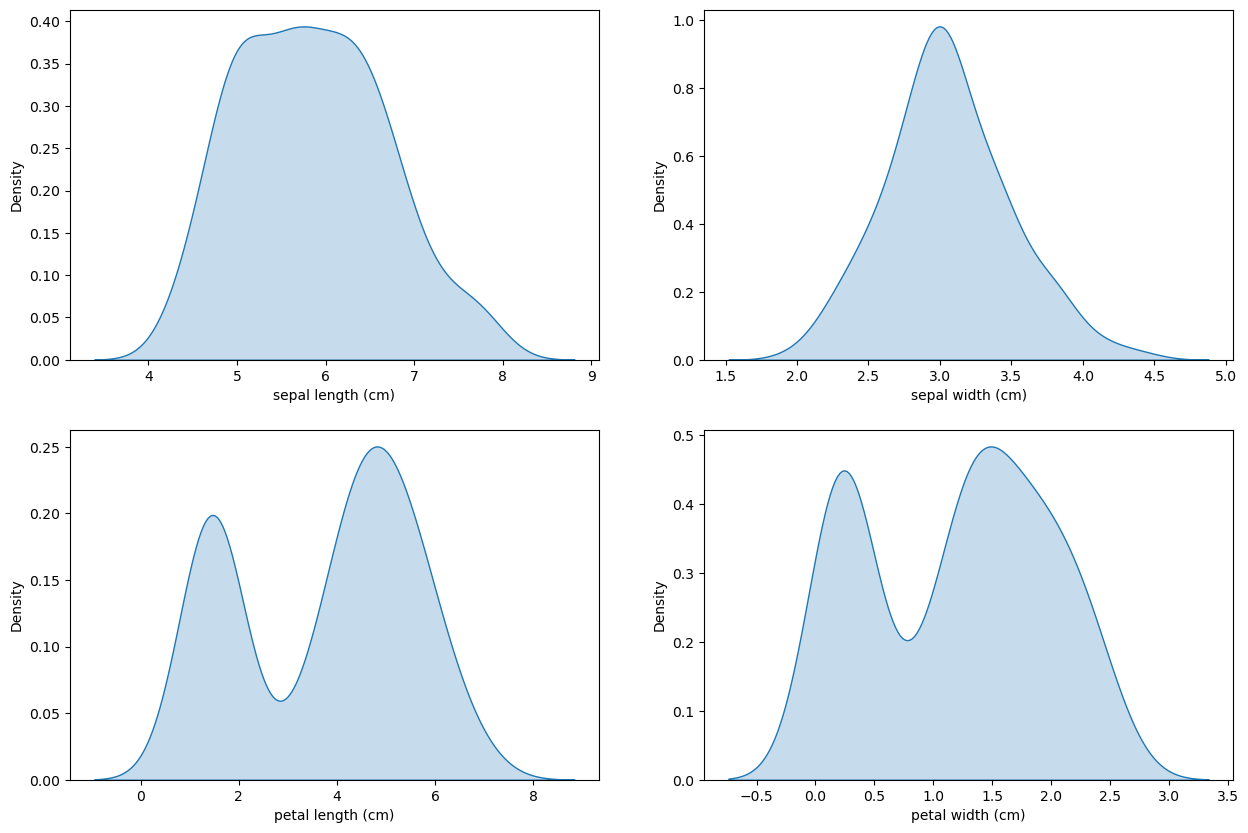

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [24]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(iris_df.select_dtypes(float)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=iris_df, x=col, fill=True)
plt.show()

iris_df.describe()

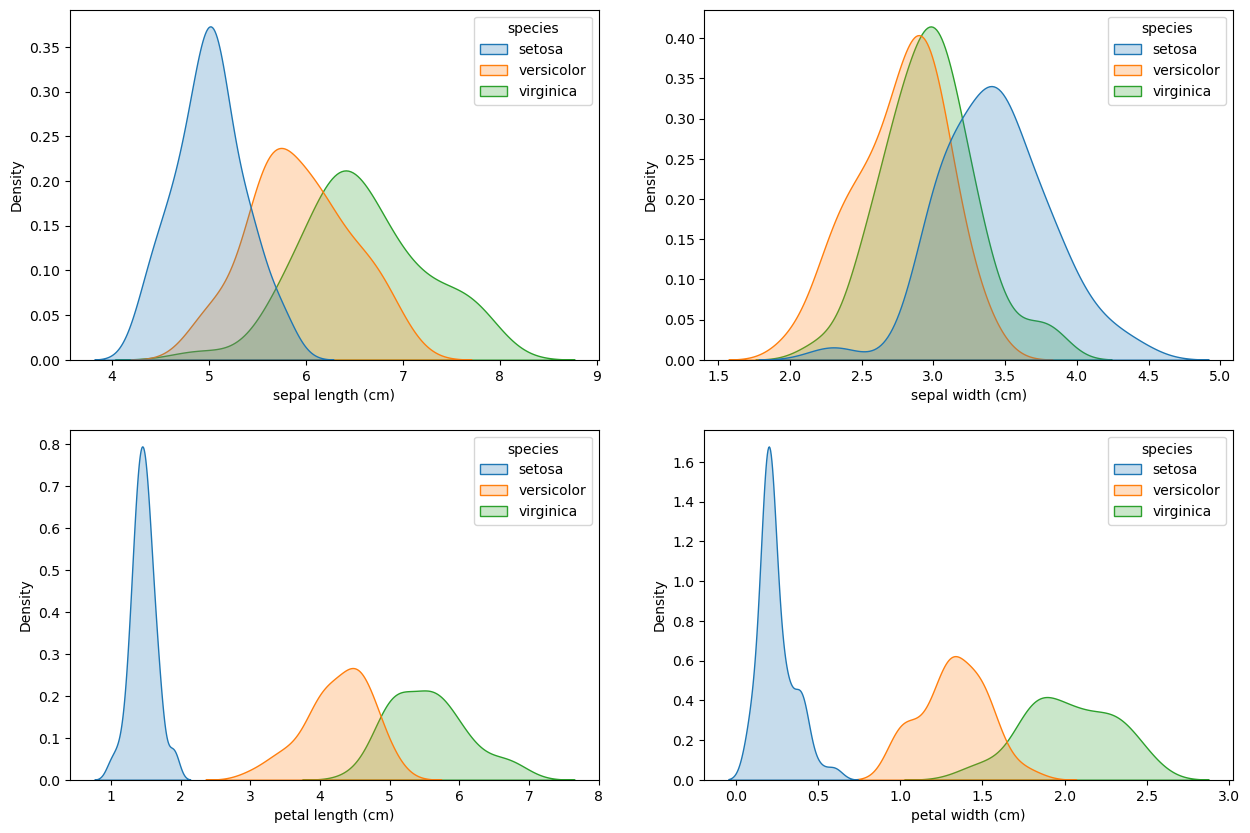

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                
                      count   mean       std  min    25%  50%    75%  max  
species                                                                    
setosa                 50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4  
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4  
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
species                                                                     
setosa                  50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

In [29]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(iris_df.select_dtypes(float)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=iris_df, x=col, fill=True, hue='species')
plt.show()

display(iris_df[['sepal length (cm)', 'sepal width (cm)', 'species']].groupby('species').describe())
iris_df[['petal length (cm)', 'petal width (cm)', 'species']].groupby('species').describe()

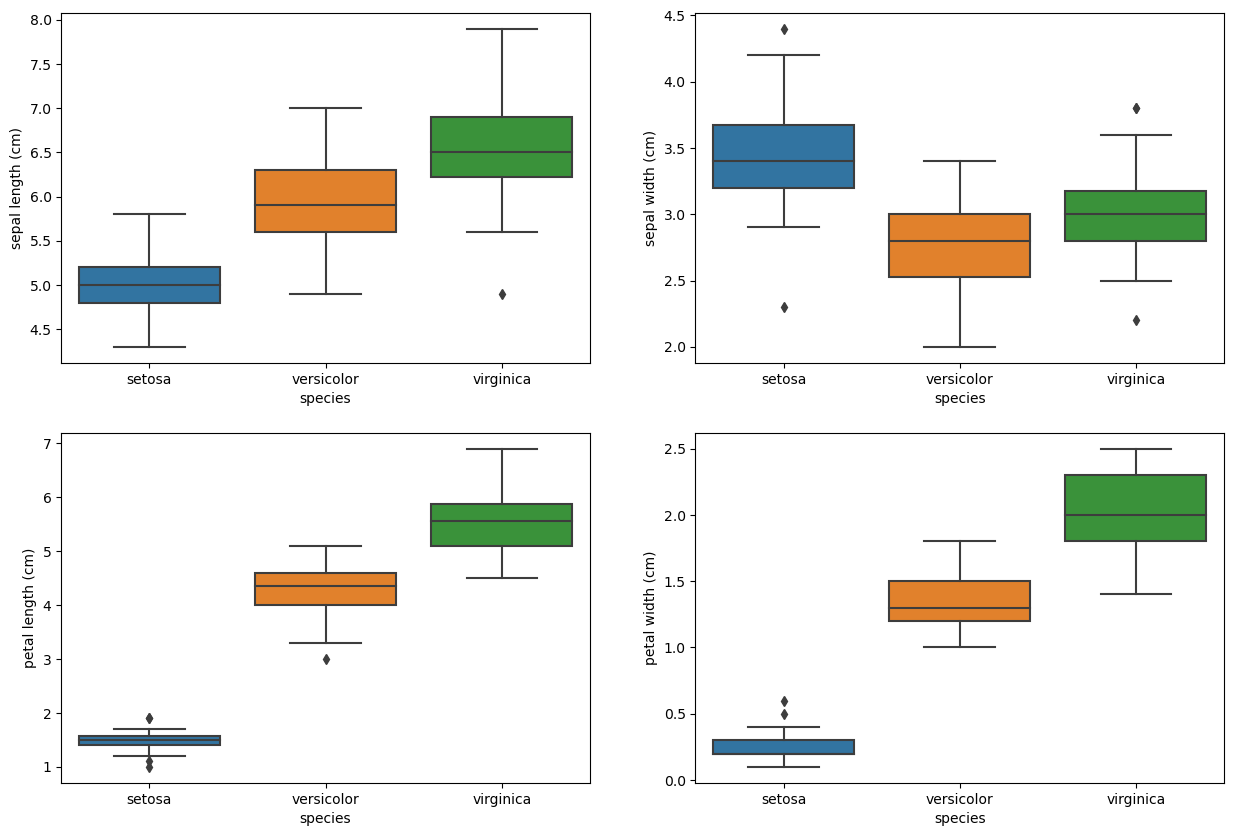

In [30]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(iris_df.select_dtypes(float)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=iris_df, x='species', y=col)
plt.show()

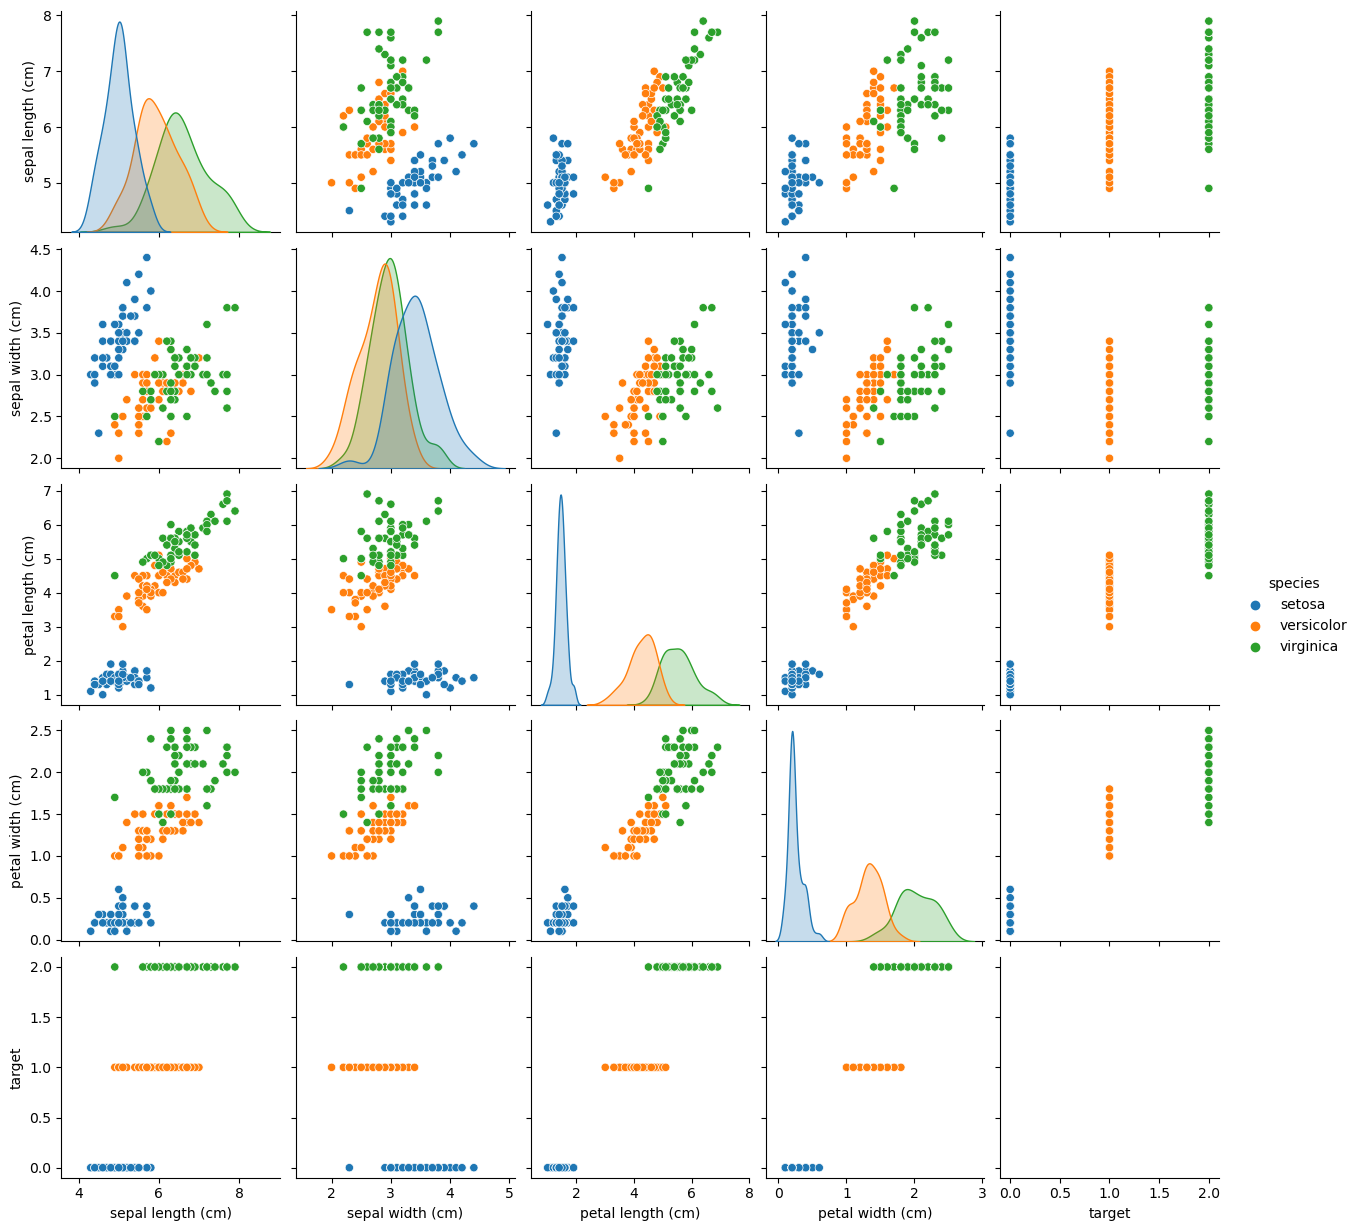

In [31]:
sns.pairplot(data=iris_df, hue='species')
plt.show()

C:\Users\didie\AppData\Local\Temp\ipykernel_33004\4166756449.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(),


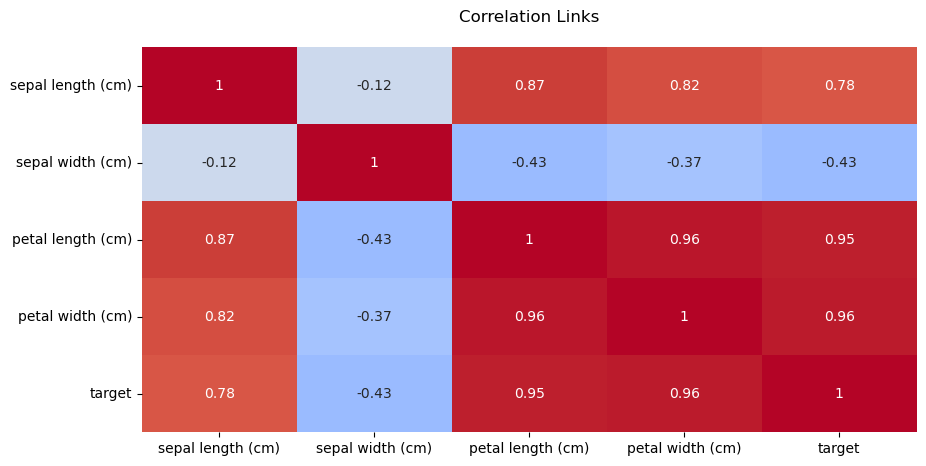

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Correlation Links\n')
sns.heatmap(iris_df.corr(),
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            cbar=False,
            annot=True)
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X = iris_df.drop(columns=['target', 'species'])
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)


In [34]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth =4)

In [35]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [36]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

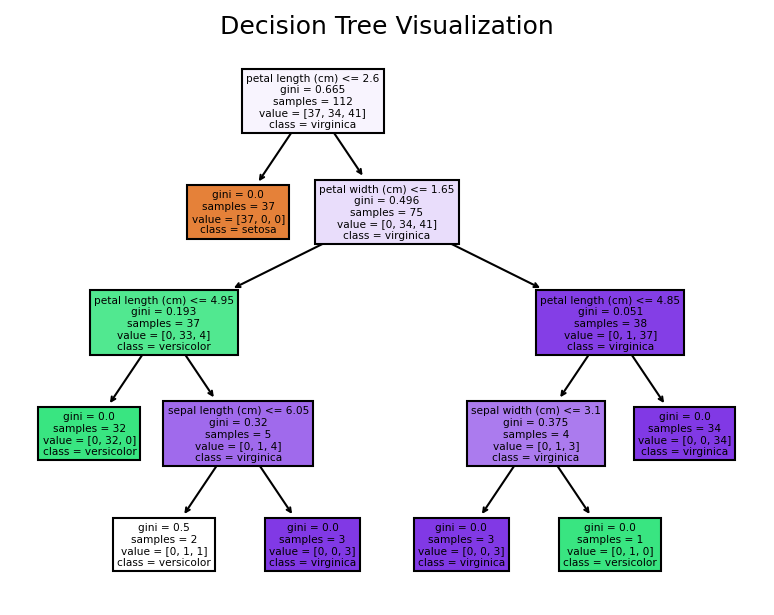

In [40]:
plt.figure(dpi=150)
# plot_tree(tree_model.get_params(), feature_names=X.columns, filled=True)
# plt.savefig('dt.png')

plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()

In [42]:
y_pred = tree_model.predict(X_test) # StandardScaler().transform(X_test) -> DecisionTreeClassifier().predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [43]:
accuracy_score(y_test, y_pred)

0.9736842105263158